In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Get the Data
df=pd.read_csv('LM Newyork Dataset.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

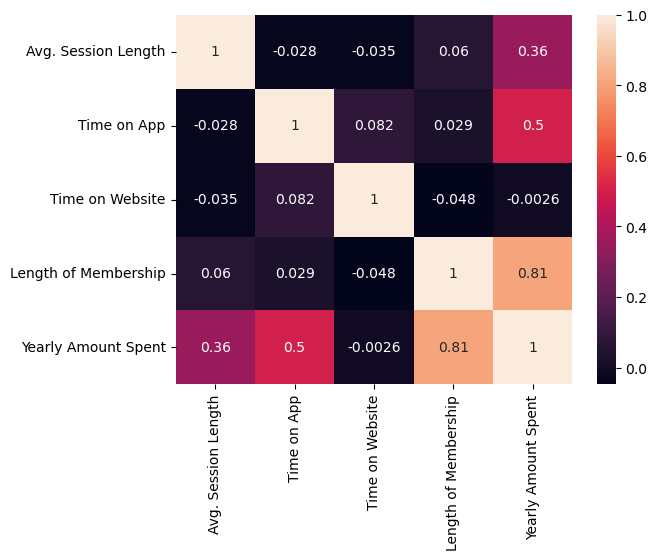

In [7]:
sns.heatmap(df.corr(),annot=True)

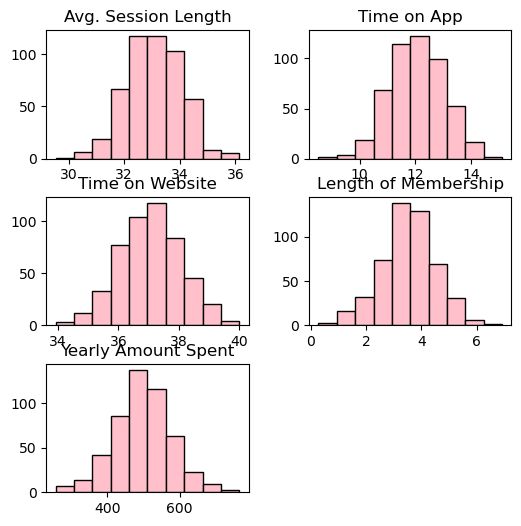

In [8]:
df.hist(figsize=(6,6),color='pink',edgecolor='black',grid=False)
plt.show()

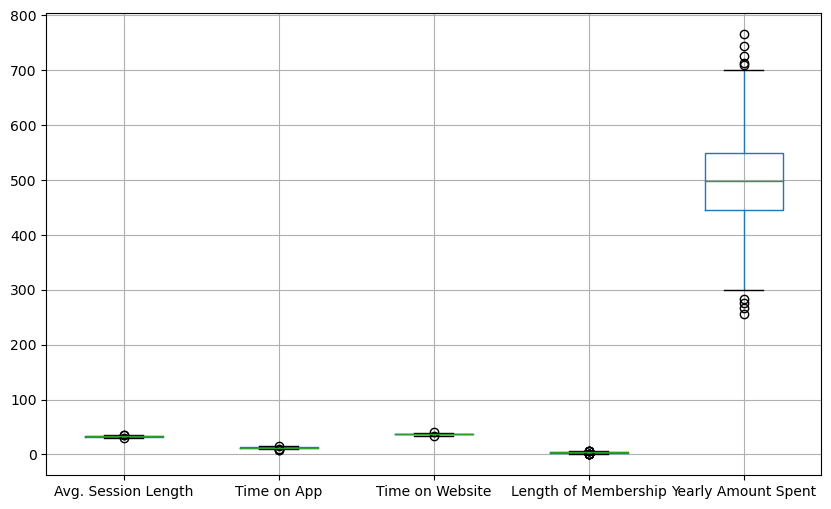

In [9]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.show()

In [10]:
x=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df[['Yearly Amount Spent']]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#test_size=0.2: 20% of the data for testing and 80% data for training.

In [12]:
#Training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
#Predicting the test data
predictions=lr.predict(x_test)
predictions

array([[438.46488047],
       [489.66184564],
       [370.06954182],
       [513.85905556],
       [495.69799866],
       [450.8872651 ],
       [458.01303781],
       [336.66556242],
       [528.51544937],
       [663.27832045],
       [559.42244853],
       [526.02431269],
       [552.20571726],
       [457.67586172],
       [450.15607806],
       [431.65097992],
       [563.58511639],
       [408.3544021 ],
       [599.61853974],
       [486.84826713],
       [716.6549357 ],
       [496.79327179],
       [411.49845257],
       [556.55139415],
       [551.84576823],
       [398.18338567],
       [421.30757533],
       [395.15395631],
       [548.52797689],
       [463.48718367],
       [558.43909629],
       [505.52726975],
       [505.87531576],
       [463.94575681],
       [425.98372415],
       [401.07293147],
       [503.60337935],
       [430.34122807],
       [569.63274312],
       [421.89472102],
       [487.26750643],
       [602.37423872],
       [616.44671936],
       [589

In [14]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     5974.
Date:                 Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                         17:13:32   Log-Likelihood:                -1488.6
No. Observations:                  400   AIC:                             2987.
Df Residuals:                      395   BIC:                             3007.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1060.5508     26.856    -39.490      0.000   -1113.350   -1007.751
Avg. Session Length     25.8882      0.532     48.637      0.000      24.842      26.935
Time on App             38.8705      0.513     75.764      0.000      37.862      39.879
Time on Website          0.4707      0.496      0.949      0.343      -0.505       1.446
Length of Membership    61.7837      0.516    119.810      0.000      60.770      62.798
==============================================================================
Omnibus:                        0.304   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.859   Jarque-Bera (JB):                0.147
Skew:                           0.002   Prob(JB):                        0.929
Kurtosis:                       3.094   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

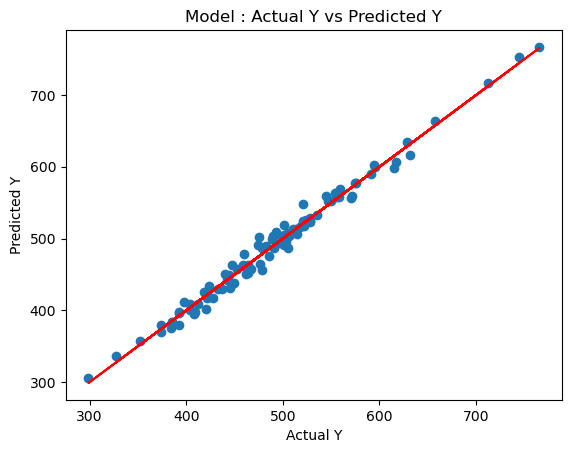

In [30]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Model : Actual Y vs Predicted Y')
plt.show()

In [31]:
#Evaluating the model
from sklearn import metrics

print('Mean Absolute Error (MAE) : ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Square Error (MSE) : ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Square Error (RSME) : ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


Mean Absolute Error (MAE) :  7.645674815886407
Mean Square Error (MSE) :  92.8901033048825
Root Mean Square Error (RSME) :  9.63795119851115
